In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

The dataset has been taken from Kaggle https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

In [2]:
data = pd.read_csv('dataset.csv')
print(data.info())

print("-"*60)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
------------------------------------------------------------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

# Visualizing the data

Text(0.5, 0, 'Applicant Income')

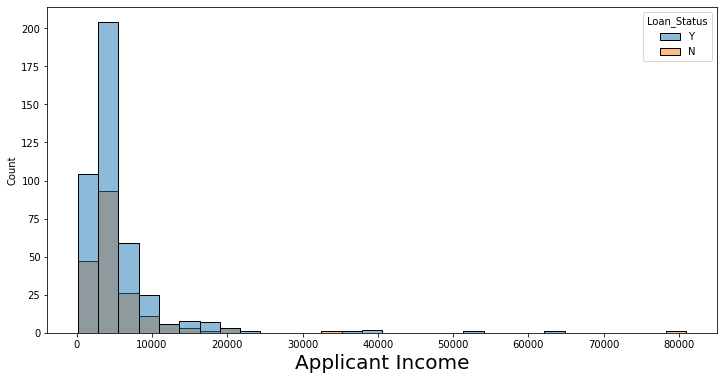

In [4]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='ApplicantIncome', hue='Loan_Status', bins=30)
plt.xlabel("Applicant Income", fontsize=20)

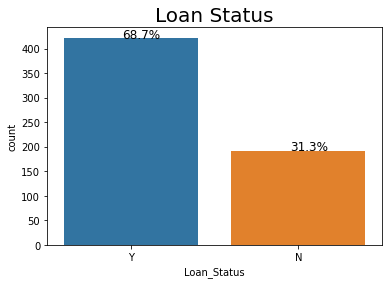

In [5]:
# Plotting the Loan Status i.e how much applicants are granted for loan

def show_percent_bars(ax, feature):
    # Shows the percentage of data above bar graphs
    
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
        
ax = sns.countplot(data=data, x='Loan_Status')
ax.set_title("Loan Status", fontsize=20)
show_percent_bars(ax, data.Loan_Status)

Text(0.5, 1.0, 'Dependents')

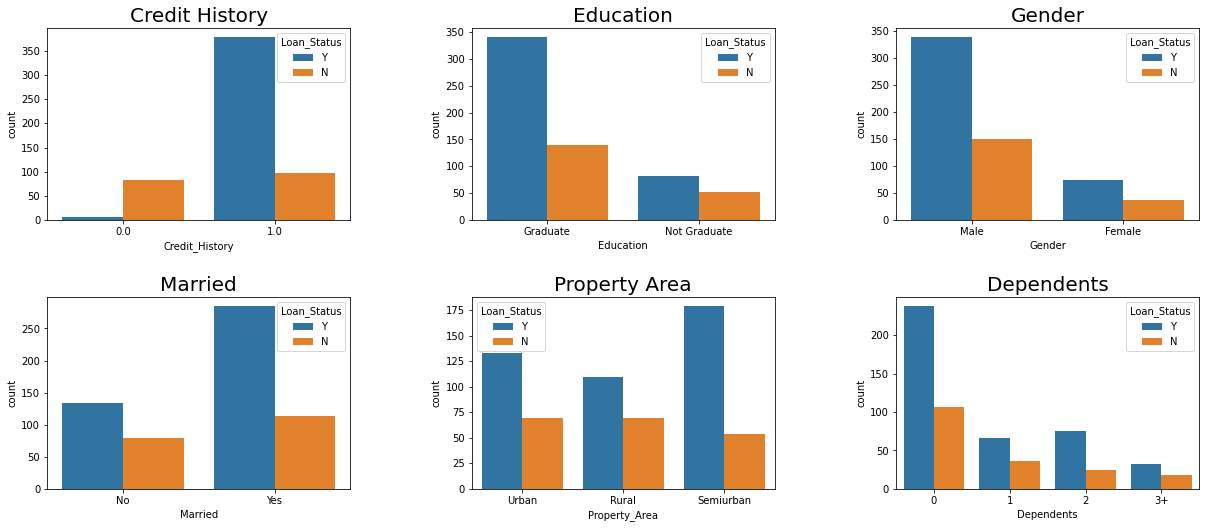

In [6]:
# making subplots
fig, axes = plt.subplots(2, 3, figsize=(20,8))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0,0].set_title('Credit History', fontsize=20)
sns.countplot(ax=axes[0,0], data=data, x='Credit_History', hue='Loan_Status')

sns.countplot(ax=axes[0,1], data=data, x='Education', hue='Loan_Status')
axes[0,1].set_title("Education", fontsize=20)

sns.countplot(ax=axes[0,2], data=data, x='Gender',hue='Loan_Status')
axes[0,2].set_title("Gender", fontsize=20)



sns.countplot(ax=axes[1,0], data=data, x='Married',hue='Loan_Status')
axes[1,0].set_title("Married", fontsize=20)


sns.countplot(ax=axes[1,1], data=data, x='Property_Area', hue='Loan_Status')
axes[1,1].set_title("Property Area", fontsize=20)

sns.countplot(ax=axes[1,2], data=data, x='Dependents', hue='Loan_Status')
axes[1,2].set_title("Dependents", fontsize=20)

In [7]:
%%html
<style>
    table {float:left}
</style>

# Let us draw some conclusions from diagrams

|   Column      | Description                                                              | What kind of feature |
|:--------------|:------------------------------------------------------------------------|:--------------------:|
|Credit History | Applicant having Credit History as 1 has high chance of getting loan     |    Important         |
|   Education   | Graduates seem to have a greater chance of receving loan                    |    good         |
|   Gender      | Does not seem any particular trend of gender                             |   not Important      |
|   Married     | Seems high chance of receving loan if you are married                    |    good         |
| Property Area | Applicant having property area in Semiurban has high chance of getting loan<br/> while in Urban area has a good chance|    Important   |
| Dependents    | little greater chance if dependent is 0                                  |   less Important      |
|Applicant Income    | No pattern                                 |   less Important      |


# Handling Null values in each Columns

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# separating numerical columns and Categorical columns
num_cols = []
cat_cols = []

for col in data.columns:
    if data[col].dtype == object:
        cat_cols.append(col)
    else:
        num_cols.append(col)

print("Numerical cols   : ",num_cols)
print("Categorical cols : ", cat_cols)

Numerical cols   :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical cols :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [10]:
df_num = data[num_cols]
df_cat = data[cat_cols]

In [11]:
df_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [12]:
# df_categorical
# If you want to fill every column with its own most frequent value you can use

df_cat = df_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_cat.isnull().sum().any() # no more missing data 

False

In [13]:
# df_num
# fill every missing value with their previous value in the same column

df_num.fillna(method='bfill', inplace=True)
df_num.isnull().sum().any() # no more missing data 

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


False

In [14]:
df_cat[cat_cols].nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [15]:
# droping column Loan_ID because it is not important for our model
df_cat.drop('Loan_ID', axis=1, inplace=True)

cat_cols.remove('Loan_ID')

# Ordinal Encoding the Categorical columns

In [16]:
ordinal_encoder = OrdinalEncoder()

df_cat[cat_cols] = ordinal_encoder.fit_transform(df_cat[cat_cols])

In [17]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,2.0,1.0


In [18]:
df = pd.concat([df_cat, df_num], axis=1)

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,5849,0.0,128.0,360.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0
2,1.0,1.0,0.0,0.0,1.0,2.0,1.0,3000,0.0,66.0,360.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2.0,1.0,2583,2358.0,120.0,360.0,1.0
4,1.0,0.0,0.0,0.0,0.0,2.0,1.0,6000,0.0,141.0,360.0,1.0


# Tranning the Model

In [20]:
selected_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Property_Area', 'Married', 'Education', 'Dependents']

X = df[selected_cols]
y = df['Loan_Status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

# almost same ratio


ratio of target in y_train : [0.67617108 0.32382892]
ratio of target in y_test : [0.73170732 0.26829268]
ratio of target in original_data : [0.68729642 0.31270358]


In [23]:
model1_xgb = XGBClassifier()
model2_LReg = LogisticRegression()
model3_DTree = DecisionTreeClassifier()

model1_xgb.fit(X_train, y_train)
model2_LReg.fit(X_train, y_train)
model3_DTree.fit(X_train, y_train)


DecisionTreeClassifier()

First predicting the models with the **trained data**

In [24]:
prediction1 = model1_xgb.predict(X_train)
yp2 = model2_LReg.predict(X_train)
yp3 = model3_DTree.predict(X_train)


print("Prediction of Training data\n")
print("XGBClassifier            - Accuracy is ",accuracy_score(y_train, prediction1))
print("Logistic Regression      - Accuracy is ",accuracy_score(y_train, yp2))
print("Decision Tree Classifier - Accuracy is ",accuracy_score(y_train, yp3))

Prediction of Training data

XGBClassifier            - Accuracy is  0.9938900203665988
Logistic Regression      - Accuracy is  0.7942973523421588
Decision Tree Classifier - Accuracy is  0.9979633401221996


Well above we have **predicted** the models **on training data**, so it might be reason<br> for predicting very much high accuracy because of overfitting

### Prediction on Testing data

In [25]:
yp4 = model1_xgb.predict(X_test)
yp5 = model2_LReg.predict(X_test)
yp6 = model3_DTree.predict(X_test)


print("Prediction on Testing data\n")
print("XGBClassifier            - Accuracy is ",accuracy_score(y_test, yp4))
print("Logistic Regression      - Accuracy is ",accuracy_score(y_test, yp5))
print("Decision Tree Classifier - Accuracy is ",accuracy_score(y_test, yp6))

Prediction on Testing data

XGBClassifier            - Accuracy is  0.7804878048780488
Logistic Regression      - Accuracy is  0.8455284552845529
Decision Tree Classifier - Accuracy is  0.7235772357723578


# Conclusion
Here *Logistic Regression* performed **very well** <br>
while *XGBClassifier* performed **good** <br>
and *Decision Tree Classifier* peformed the **worst**.

**Hey**, do *upvote* the Notebook, it will keep me motivated.

Please *comment* your valuable suggestions.